## 영상처리 2주차

### 라이브러리 설치 및 버전확인

* 노트북 - python 3.10.6

In [2]:
import cv2
import numpy as np
import matplotlib as mlp
import pafy
import pygame

print(cv2.__version__)
print(np.__version__)
print(mlp.__version__)
print(pafy.__version__)
print(pygame.__version__)

pygame 2.2.0 (SDL 2.0.22, Python 3.10.6)
Hello from the pygame community. https://www.pygame.org/contribute.html
4.7.0
1.23.2
3.6.2
0.5.5
2.2.0


### 2.1-1 이미지 출력

In [4]:
imageFile = '../data/lena.png'
img = cv2.imread(imageFile) # 컬러
img2 = cv2.imread(imageFile, 0) # 흑백

cv2.imshow('lena color', img)
cv2.imshow('lena gray scale', img2)

key = cv2.waitKey()
print(key)
cv2.destroyAllWindows()

: 

### 2.1-2 파일 이름이 한글인 경우

In [6]:
import cv2
import numpy as np

imageFile = '../data/레나.png'

encode_img1 = np.fromfile(imageFile, np.uint8) # 데이터명이 한글 인 경우의 사진 데이터를 읽어옴
img1 = cv2.imdecode(encode_img1, cv2.IMREAD_UNCHANGED) # 사진데이터를 디코딩 (이걸해야 제대로 화면에 출력됨)

encode_img2 = np.fromfile(imageFile, np.uint8) # 데이터명이 한글 인 경우의 사진 데이터를 읽어옴
img2 = cv2.imdecode(encode_img2, 0) # 사진데이터를 디코딩 (이걸해야 제대로 화면에 출력됨)

cv2.imshow('lena color', img1)
cv2.imshow('lena gray scale', img2)

key = cv2.waitKey()
print(key)
cv2.destroyAllWindows()

113


### 2.2 이미지 영상 저장

In [12]:
imageFile = '../data/lena.png'
img = cv2.imread(imageFile) # 컬러
# img2 = cv2.imread(imageFile, 0) # 흑백

# cv2.imwrite('./data/lena.bmp', img) # 비트맵으로 저장
cv2.imwrite('../data/lena3.png', img, [cv2.IMWRITE_PNG_COMPRESSION, 9]) # 압축률 9의 png 이미지
# cv2.imwrite('./data/lena2.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 90]) # 90%의 품질을 갖는 jpg 이미지

True

### 2.3 mlt 에서의 출력

* opencv는 bgr 순서 이지만, plt는 rgb 순서이므로 색상을 변환시켜서 출력해줘야 한다

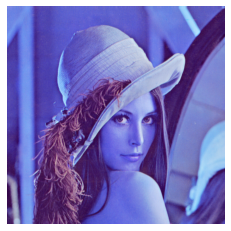

In [13]:
import cv2
from matplotlib import pyplot as plt

imgFile = '../data/lena.png'
img = cv2.imread(imgFile)

plt.axis('off') # plt의 눈금선 제거
plt.imshow(img)
plt.show()

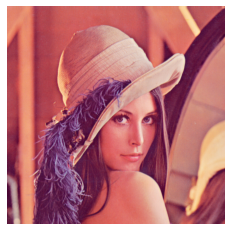

In [14]:
import cv2
from matplotlib import pyplot as plt

imgFile = '../data/lena.png'
img = cv2.imread(imgFile)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # 색상정보 변경

plt.axis('off') # plt의 눈금선 제거
plt.imshow(img)
plt.show()

### 2.4 plt 흑백으로 출력

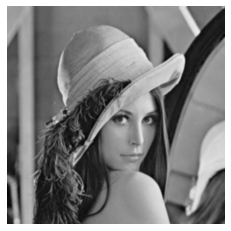

In [17]:
import cv2
from matplotlib import pyplot as plt

imgFile = '../data/lena.png'
img = cv2.imread(imgFile, cv2.IMREAD_GRAYSCALE)

plt.axis('off')
plt.imshow(img, cmap='gray', interpolation='bicubic') # 영상을 gray 컬러맵으로, bicubic으로 보간
plt.show()

### 2.5 plt 여백 조정

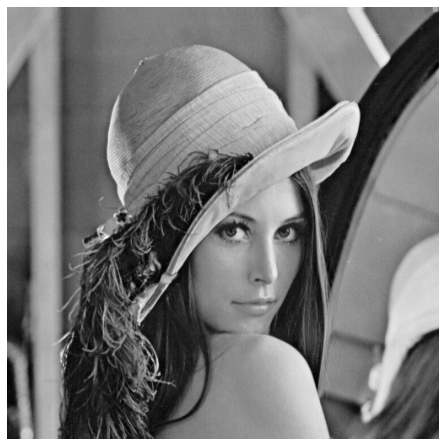

In [23]:
import cv2
from matplotlib import pyplot as plt

imgFile = '../data/lena.png'
img = cv2.imread(imgFile, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize = (6, 6))

plt.subplots_adjust(left=0, right=1, bottom=0, top=1) # 좌우 [0, 1] / 상하 [0, 1]로 조정
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.savefig('./data/test.png')
plt.show()

### 2.6 plt 창 하나에 여러 이미지 출력

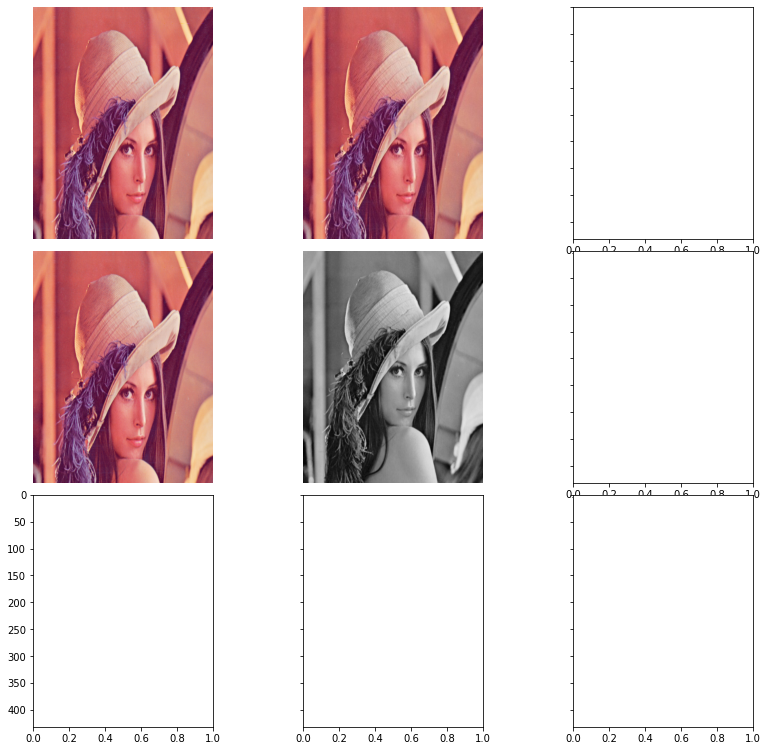

In [28]:
import cv2
import datetime
from matplotlib import pyplot as plt


path = '../data/'
img1 = cv2.imread(path+'lena.bmp')
img2 = cv2.imread(path+'lena2.jpg')
img3 = cv2.imread(path+'lena3.png')
img4 = cv2.imread(path+'test.png')

# bgr rgb 색상 변환
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(2, 2, figsize = (10, 10), sharey=True) # 2 x 2 서브플롯을 (10, 10)의 크기로 생성
fig.canvas.manager.set_window_title('test') # 창 이름

ax[0][0].axis('off')
ax[0][0].imshow(img1, aspect = 'auto') # aspect = 'auto' 비율을 자동으로 맞춰 줌

ax[0][1].axis('off')
ax[0][1].imshow(img2, aspect = 'auto') # aspect = 'auto' 비율을 자동으로 맞춰 줌

ax[1][0].axis('off')
ax[1][0].imshow(img3, aspect = 'auto') # aspect = 'auto' 비율을 자동으로 맞춰 줌

ax[1][1].axis('off')
ax[1][1].imshow(img4, aspect = 'auto') # aspect = 'auto' 비율을 자동으로 맞춰 줌

# wspace=0.5, hspace=0.05 / 가로 세로 여백
plt.subplots_adjust(left = 0, bottom = 0, right=1, top=1, wspace=0.5, hspace=0.05) 

now = datetime.datetime.now()
now = (str(now.year) + '_' +str(now.month)+ '_' +str(now.day)+ '_' + 
    str(now.hour)+ '_' +str(now.minute)+ '_' +str(now.second))
plt.savefig(path + str(now) + '.png', bbox_inches = 'tight')
plt.show()

### 2.7-1 웹캠 캡처

In [1]:
import cv2

# python 3.11 / opencv 4.7.0 이상에서 웹캠을 실행할 경우 이와 같이 실행
# from cv2 import VideoCapture 
# cap = VideoCapture(0)

cap = cv2.VideoCapture(0)

frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
        int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))) # 웹캠의 지원 크기를 불러옴

while True:
    ret, frame = cap.read() 
    
    if not ret: # ret이 false 이면 종료
        break
    
    cv2.imshow('frame', frame)
    key = cv2.waitKey(1)
    if key == 27:
        break
    
if cap.isOpened():
    cap.release()
    
cv2.destroyAllWindows()

### 2.7-2 비디오 캡처

* cv2.waitKey()의 변수 값을 25로 지정해줘야 영상 속도가 정상적인 속도로 출력된다.

In [6]:
import cv2

cap = cv2.VideoCapture('../data/vtest.avi')

frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
        int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))) # 웹캠의 지원 크기를 불러옴

while True:
    ret, frame = cap.read() 
    
    if not ret: # ret이 false 이면 종료
        break
    
    cv2.imshow('frame', frame)
    key = cv2.waitKey(25) # 25로 줘야 프레임 속도가 정상적으로 출력 된다.
    if key == 27:
        break
    
if cap.isOpened():
    cap.release()
    
cv2.destroyAllWindows()

### 2.8 안드로이드 폰과 연결 (여기는 나중에 다시해보기, 연결이 안됨)

In [2]:
import cv2

cap = cv2.VideoCapture('http://192.168.123.146:8080/')

frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))

while True:
    ret, frame = cap.read()
    
    if not ret:
        break
    
    cv2.imshow('frame', frame)
    
    key = cv2.waitKey(25)
    if key == 27:
        break

if cap.isOpened():
    cap.release()

cv2.destroyAllWindows()

### 2.9-1 파이썬으로 유튜브 영상 다운

* pytube 활용
* https://hleecaster.com/python-pytube/

In [4]:
from pytube import YouTube

DOWNLOAD_FOLDER = "C:/j"
url = "https://youtu.be/3nQNiWdeH2Q"

yt = YouTube(url)

print("제목 : ", yt.title)
print("길이 : ", yt.length)
print("게시자 : ", yt.author)
print("게시날짜 : ", yt.publish_date)
print("조회수 : ", yt.views)
print("키워드 : ", yt.keywords)
# print("설명 : ", yt.description)
print("썸네일 : ", yt.thumbnail_url)

stream = yt.streams.get_highest_resolution()
stream.download(DOWNLOAD_FOLDER)

제목 :  Janji - Heroes Tonight (feat. Johnning) [NCS Release]
길이 :  208
게시자 :  NoCopyrightSounds
게시날짜 :  2015-06-09 00:00:00
조회수 :  306163922
키워드 :  ['Janji - Heroes Tonight (feat. Johnning)', 'Janji', 'Heroes Tonight', '(feat. Johnning)', 'Heroes', 'Tonight', 'Janji - Heroes Tonight', 'nocopyrightsounds', 'ncs']
썸네일 :  https://i.ytimg.com/vi/3nQNiWdeH2Q/sddefault.jpg


'C:/j\\Janji - Heroes Tonight (feat Johnning) [NCS Release].mp4'

### 2.9-2 유튜브 영상 다운 youtube_dl and pafy

#### 나중에 다시 해보기

* 책 내용으로 만들어봄
* python 3.8.10
* https://pypi.org/project/yt-dlp/

In [ ]:
import cv2
import pafy

url = 'https://youtu.be/3nQNiWdeH2Q'
video = pafy.new(url)

print('title: ' + video.title)
print('rating: ' + video.rating)
print('duration: ' + video.duration)

best = video.getbest()

print('resolution: ' + best.resolution)

cap = cv2.VideoCapture(best.url)

frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))

while True:
    ret, frame = cap.read()
    
    if not ret:
        break
    
    cv2.imshow('frame', frame)
    
    key = cv2.waitKey(25)
    if key == 27:
        break

if cap.isOpened():
    cap.release()

cv2.destroyAllWindows()

### 2.10 웹캠 화면을 영상파일로 저장

In [4]:
import cv2

cap = cv2.VideoCapture(0)
frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
fourcc = cv2.VideoWriter_fourcc(*'XVID')

out1 = cv2.VideoWriter('../data/recode0.mp4', fourcc, 30.0, frame_size) # 저장될 위치, 이름 / 저장 포맷 / 프레임 / 영상 크기 / 동일 색상 저장
out2 = cv2.VideoWriter('../data/recode1.mp4', fourcc, 30.0, frame_size, isColor=False) # 흑백 저장

while True:
    ret, frame = cap.read()
    
    if not ret:
        break
    
    out1.write(frame)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    out2.write(gray)
    
    cv2.imshow('frame', frame)
    cv2.imshow('gray', gray)
    
    key = cv2.waitKey(1)
    if key == 27:
        break

cap.release()
out1.release()
out2.release()
cv2.destroyAllWindows()